In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf.scf import hf

import matplotlib as mpl
mpl.style.use(["seaborn", "thesis"])
ticker = mpl.ticker

from SCFInitialGuess.utilities.analysis import density_cut, matrix_error

export_folder = "/home/jo/Repos/MastersThesis/EmbeddedBlocks/figures/"


/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Fetch Dataset 

In [36]:
folder = "../../dataset/EthenT/"
subfolder = "EmbeddedBlocks/"
postfix = "EthenT"
basis = "6-311++g**"
molecules = np.load(folder + "molecules" + postfix + ".npy")
ind_test = int(0.8 * len(molecules))
molecules = molecules[ind_test:]

# Select Molecule 

In [37]:
ind = 0 
std_min = 1e5
for i, mol in enumerate(molecules):
    
    std = np.std(np.array(mol.positions)[:, 2])
    
    if std < std_min:
        ind = i
        std_min = std
        print(str(i) + ", " + str(std))

0, 0.9102344890727743
1, 0.8746059896912074
2, 0.8159171822365922
4, 0.4087638729158207
20, 0.2733965353980224
31, 0.2543033894296101
130, 0.16325977276193834
153, 0.14742367933393005
156, 0.11436080088220853


In [38]:
mol = molecules[ind]
list(mol.geometry)

[('C', [-2.0067141349, 0.6287976193, -0.0633864471]),
 ('C', [-3.1046580953, 0.5125558884, 0.052710516]),
 ('H', [-2.9861683921, -0.8473736489, -0.1117090222]),
 ('H', [-3.9514894562, 1.1627468493, -0.2483410113]),
 ('H', [-0.6957279226, 0.1163162677, -0.1512003582]),
 ('H', [-1.4765903595, 1.6103354138, -0.2913884365])]

In [39]:
from pyscf.gto import Mole

# this molecule was not in dateset!!!
#mole = molecules[1][0].get_pyscf_molecule()
mole = Mole()
mole.atom = mol.geometry

mole.basis = basis
mole.build()

s = hf.get_ovlp(mole)

In [40]:
coords = mole.atom_coords()[:, 2]
np.mean(coords), np.std(coords)

(-0.2561570246905925, 0.21611059305329258)

# Parameters 

In [41]:
z_value = 4.6 #(auch gut: 5.2 besser für bar)
nx = 160
ny = 160

norm = None#plt.Normalize(0, 7.6e-5)

# Converged

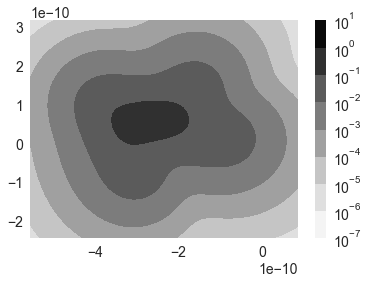

In [42]:
mf = hf.RHF(mole)
mf.verbose = 1
mf.run()

dm = mf.make_rdm1()
dm_density, x, y = density_cut(mole, dm, nx, ny, z_value=z_value)

plt.contourf(*np.meshgrid(x, y), dm_density, locator=ticker.LogLocator(), norm=norm)
plt.colorbar()
plt.show()

# GWH 

In [43]:
f_gwh = np.load(folder + subfolder + "f_gwh.npy")
f_embedded_gwh = np.load(folder + subfolder + "f_embedded_gwh.npy")

## Normal

In [44]:
from SCFInitialGuess.utilities.dataset import density_from_fock

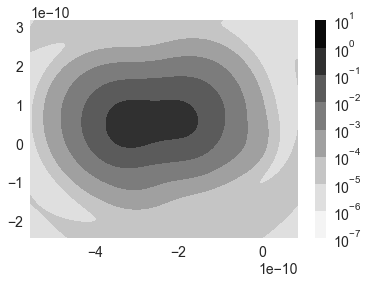

In [45]:
mf = hf.RHF(mole)
mf.verbose = 1
mf.run()

dm = density_from_fock(f_gwh[ind], s, mole)
dm_density, x, y = density_cut(mole, dm, nx, ny, z_value=z_value)

plt.contourf(*np.meshgrid(x, y), dm_density, locator=ticker.LogLocator(), norm=norm)
plt.colorbar()
plt.show()

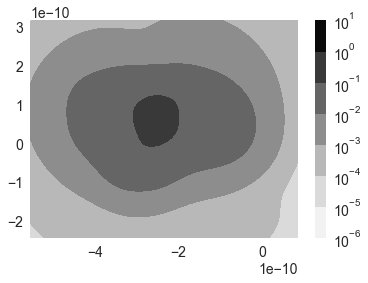

In [46]:
mf = hf.RHF(mole)
mf.verbose = 1
mf.run()

dm = density_from_fock(f_embedded_gwh[ind], s, mole)
dm_density, x, y = density_cut(mole, dm, nx, ny, z_value=z_value)

plt.contourf(*np.meshgrid(x, y), dm_density, locator=ticker.LogLocator(), norm=norm)
plt.colorbar()
plt.show()

# SAD 

In [47]:
f_sad = np.load(folder + subfolder + "f_sad.npy")
f_embedded_sad = np.load(folder + subfolder + "f_embedded_sad.npy")

## Normal 

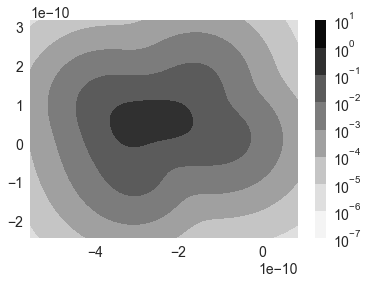

In [48]:
mf = hf.RHF(mole)
mf.verbose = 1
mf.run()

dm = density_from_fock(f_sad[ind], s, mole)
dm_density, x, y = density_cut(mole, dm, nx, ny, z_value=z_value)

plt.contourf(*np.meshgrid(x, y), dm_density, locator=ticker.LogLocator(), norm=norm)
plt.colorbar()
plt.show()

## EMbedded 

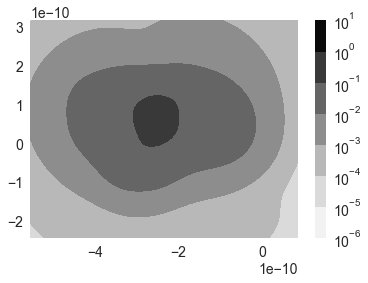

In [49]:
mf = hf.RHF(mole)
mf.verbose = 1
mf.run()

dm = density_from_fock(f_embedded_gwh[ind], s, mole)
dm_density, x, y = density_cut(mole, dm, nx, ny, z_value=z_value)

plt.contourf(*np.meshgrid(x, y), dm_density, locator=ticker.LogLocator(), norm=norm)
plt.colorbar()
plt.show()

# H_core 

In [50]:
f_embedded_core = np.load(folder + subfolder + "f_pure.npy")

## Actual H_core 

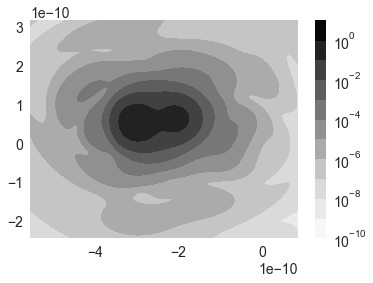

In [51]:
from pyscf.scf import hf
mf = hf.RHF(mole)
mf.verbose = 1
mf.run()

dm = hf.init_guess_by_1e(mole)
dm_density, x, y = density_cut(mole, dm, nx, ny, z_value=z_value)

plt.contourf(*np.meshgrid(x, y), dm_density, locator=ticker.LogLocator(), norm=norm)
plt.colorbar()
plt.show()

## Embedded zeros 

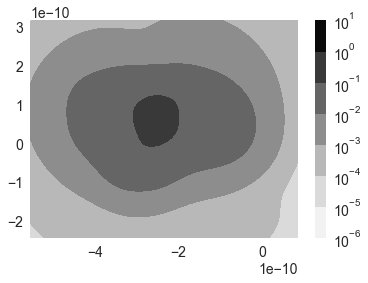

In [52]:
mf = hf.RHF(mole)
mf.verbose = 1
mf.run()

dm = density_from_fock(f_embedded_gwh[ind], s, mole)
dm_density, x, y = density_cut(mole, dm, nx, ny, z_value=z_value)

plt.contourf(*np.meshgrid(x, y), dm_density, locator=ticker.LogLocator(), norm=norm)
plt.colorbar()
plt.show()